In [1]:
!ip install fitz
!pip install pymupdf
!pip install path


Object "install" is unknown, try "ip help".
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 65.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import nltk
from nltk.corpus import stopwords
nltk.download('words')
nltk.download("popular")
nltk.download('stopwords')


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   U

True

In [3]:
import fitz
import pandas as pd
from path import Path
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from collections import OrderedDict

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path="/content/drive/MyDrive/AI/eval.xlsx"

df=pd.read_excel(path)

In [6]:
print(df.head())

                                                text  HS
0  Hurray, saving us $$$ in so many ways @potus @...   1
1  Why would young fighting age men be the vast m...   1
2  @KamalaHarris Illegals Dump their Kids at the ...   1
3  NY Times: 'Nearly All White' States Pose 'an A...   0
4  Orban in Brussels: European leaders are ignori...   0


In [7]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


In [8]:
import re
import nltk
from nltk.util import pr
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string 
stopword= set(stopwords.words("english"))

In [9]:
def clean (text):

    text = str(text).lower()

    text = re.sub('\[.*?\]', '', text)

    text = re.sub('https?://\S+\www\.\S+', '', text)

    text = re.sub('<.*?>+','', text)

    text = re.sub('[%s]' % re.escape(string.punctuation),'' , text)
  
    text = re.sub('\n', '', text)

    text = re.sub('\w\d\w*', '', text)

    text=[word for word in text.split(' ') if word not in stopword]

    text=" ".join(text)

    text = [stemmer.stem (word) for word in text.split(' ')]

    text=" ".join(text)

    return text

df["text"] = df["text"].apply(clean) 
print(df.head())


                                                text  HS
0  hurray save us  mani way potus realdonaldtrump...   1
1  would young fight age men vast major one escap...   1
2  kamalaharri illeg dump kid border like road ki...   1
3  ny time near white state pose array problem im...   0
4  orban brussel european leader ignor peopl want...   0


In [10]:
print(df.head())


                                                text  HS
0  hurray save us  mani way potus realdonaldtrump...   1
1  would young fight age men vast major one escap...   1
2  kamalaharri illeg dump kid border like road ki...   1
3  ny time near white state pose array problem im...   0
4  orban brussel european leader ignor peopl want...   0


In [11]:
df=df.dropna()

In [12]:
print(df.head())

                                                text  HS
0  hurray save us  mani way potus realdonaldtrump...   1
1  would young fight age men vast major one escap...   1
2  kamalaharri illeg dump kid border like road ki...   1
3  ny time near white state pose array problem im...   0
4  orban brussel european leader ignor peopl want...   0


In [13]:
!pip install pyswarm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4478 sha256=6804b49a72ff5696ef31b7f840e8d1e5e3dc580461b87225b0e39eb5bf6e6c6b
  Stored in directory: /root/.cache/pip/wheels/ff/d2/b7/80118e5698de2bd0b8d1b3397abf7fdfc45c15ffc454b52145
Successfully built pyswarm


In [14]:
import pandas as pd
import numpy as np
import nltk
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from pyswarm import pso

In [15]:
X = df['text']
y = df['HS']
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

In [16]:
train_size = int(0.7 * X_vec.shape[0])
X_train = X_vec[:train_size]
y_train = y[:train_size]
X_test = X_vec[train_size:]
y_test = y[train_size:]

In [17]:
def fitness_function(weights, X, y):
    clf = DecisionTreeClassifier(random_state=0, max_depth=10, max_features=None)
    clf.fit(X.multiply(weights), y)
    y_pred = clf.predict(X.multiply(weights))
    return -accuracy_score(y, y_pred)


In [18]:
n_features = X_train.shape[1]
lb = np.zeros(n_features)
ub = np.ones(n_features)
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
weights, _ = pso(fitness_function, lb, ub, args=(X_train, y_train), omega=0.5, phip=0.3, phig=0.9)

Stopping search: maximum iterations reached --> 100


In [19]:
clf = DecisionTreeClassifier(random_state=0, max_depth=10, max_features=None)
clf.fit(X_train.multiply(weights), y_train)
y_pred = clf.predict(X_test.multiply(weights))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.14777777777777779
Confusion Matrix:
 [[ 152 2299]
 [   2  247]]


In [20]:
! pip install scikit-plot==0.3.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import scikitplot as skplt

<Axes: title={'center': 'Confusion Matrix for GA'}, xlabel='Predicted label', ylabel='True label'>

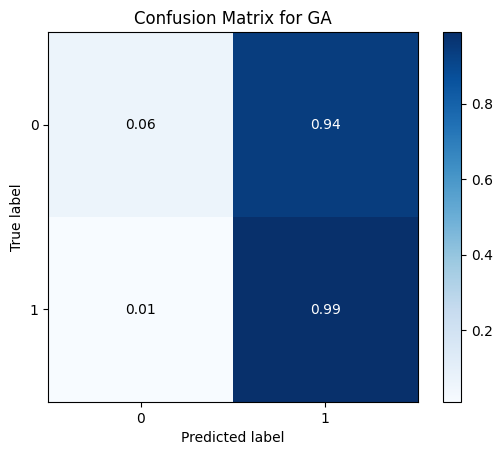

In [22]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, title = 'Confusion Matrix for GA')

<Axes: title={'center': 'Hate Speech Classification Curve'}, xlabel='Training examples', ylabel='Score'>

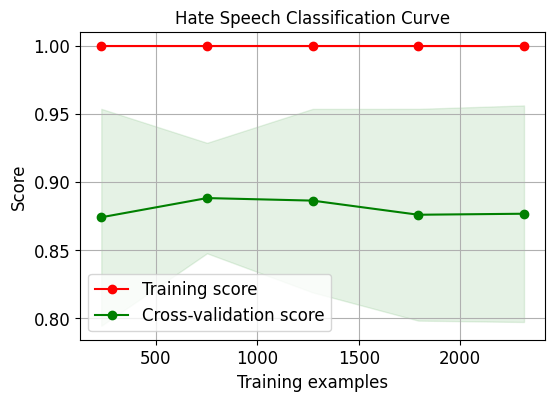

In [23]:
skplt.estimators.plot_learning_curve(DecisionTreeClassifier(), X_test, y_test,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Hate Speech Classification Curve")

In [25]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

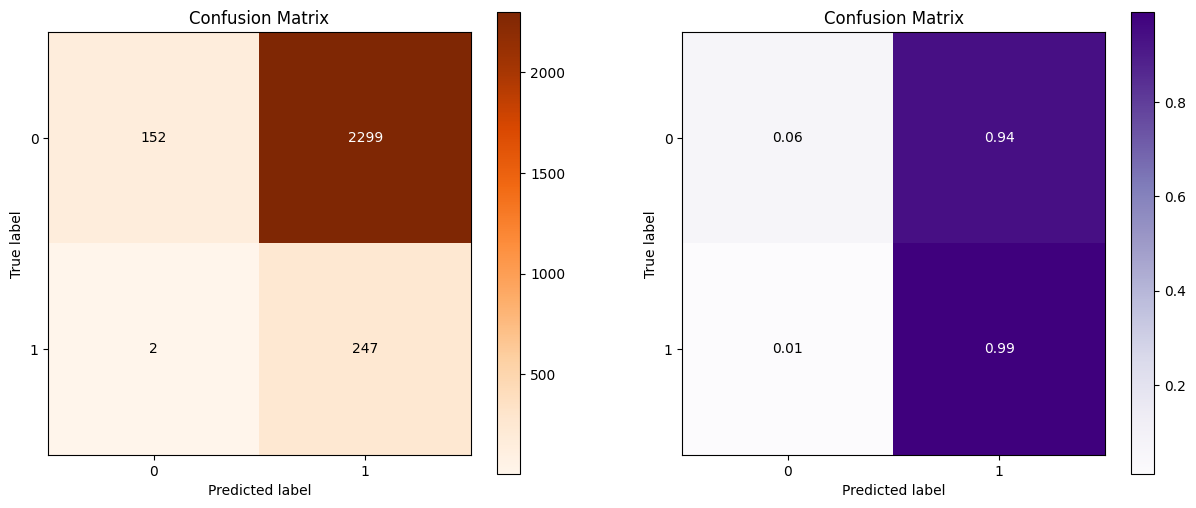

In [26]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    title="Confusion Matrix",
                                    cmap="Oranges",
                                    ax=ax1)

ax2 = fig.add_subplot(122)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    ax=ax2)